In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
df = pd.read_csv('UK-HPI-full-file-2022-10.csv')

In [4]:
df

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139034,01/06/2022,Yorkshire and The Humber,E12000003,204585.57582,150.244196,147.473459,0.512038,4.470802,200812.69835,5241.0,...,271009.99480,163.203112,2.505661,11.325680,160.0,200049.42322,149.028609,0.431133,3.648565,5081.0
139035,01/07/2022,Yorkshire and The Humber,E12000003,208098.60081,152.824103,149.221224,1.717142,15.598955,203192.60743,5811.0,...,280289.75564,168.791414,3.424140,17.831235,58.0,203345.75775,151.484243,1.647760,15.335160,5753.0
139036,01/08/2022,Yorkshire and The Humber,E12000003,211840.98423,155.572446,151.490878,1.798370,13.690287,206283.16575,5367.0,...,291209.07239,175.367063,3.895725,25.023780,59.0,206829.65781,154.079605,1.713289,12.688983,5308.0
139037,01/09/2022,Yorkshire and The Humber,E12000003,213592.57647,156.858786,153.456963,0.826843,8.968226,208960.35858,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139039 entries, 0 to 139038
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    139039 non-null  object 
 1   RegionName              139039 non-null  object 
 2   AreaCode                139039 non-null  object 
 3   AveragePrice            139039 non-null  float64
 4   Index                   139039 non-null  float64
 5   IndexSA                 4674 non-null    float64
 6   1m%Change               138596 non-null  float64
 7   12m%Change              133999 non-null  float64
 8   AveragePriceSA          4674 non-null    float64
 9   SalesVolume             134540 non-null  float64
 10  DetachedPrice           132682 non-null  float64
 11  DetachedIndex           132682 non-null  float64
 12  Detached1m%Change       132273 non-null  float64
 13  Detached12m%Change      127798 non-null  float64
 14  SemiDetachedPrice   

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [7]:
df.head(24)

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,year,month
0,2004-01-01,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0,2004,1
1,2004-02-01,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0,2004,2
2,2004-03-01,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0,2004,3
3,2004-04-01,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0,2004,4
4,2004-05-01,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0,2004,5
5,2004-06-01,Aberdeenshire,S12000034,89267.61305,44.652797,NaN,3.342974,NaN,NaN,525.0,...,3.234539,NaN,164.0,89139.77924,44.967382,3.383150,NaN,361.0,2004,6
6,2004-07-01,Aberdeenshire,S12000034,93047.50105,46.543545,NaN,4.234333,NaN,NaN,652.0,...,3.915139,NaN,163.0,93022.86929,46.926242,4.356181,NaN,489.0,2004,7
7,2004-08-01,Aberdeenshire,S12000034,97790.66757,48.916137,NaN,5.097575,NaN,NaN,512.0,...,4.601767,NaN,130.0,97937.62146,49.405534,5.283381,NaN,382.0,2004,8
8,2004-09-01,Aberdeenshire,S12000034,98663.95545,49.352967,NaN,0.893018,NaN,NaN,497.0,...,0.612422,NaN,142.0,98913.87933,49.898016,0.996816,NaN,355.0,2004,9
9,2004-10-01,Aberdeenshire,S12000034,99083.88349,49.563020,NaN,0.425614,NaN,NaN,590.0,...,0.974381,NaN,164.0,99131.45382,50.007774,0.219964,NaN,426.0,2004,10


In [119]:
df.RegionName.unique()

array(['Aberdeenshire', 'Adur', 'Allerdale', 'Amber Valley', 'Angus',
       'Antrim and Newtownabbey', 'Ards and North Down',
       'Argyll and Bute', 'Armagh City Banbridge and Craigavon', 'Arun',
       'Ashfield', 'Ashford', 'Babergh', 'Barking and Dagenham', 'Barnet',
       'Barnsley', 'Barrow-in-Furness', 'Basildon',
       'Basingstoke and Deane', 'Bassetlaw',
       'Bath and North East Somerset', 'Bedford', 'Belfast', 'Bexley',
       'Birmingham', 'Blaby', 'Blackburn with Darwen', 'Blackpool',
       'Blaenau Gwent', 'Bolsover', 'Bolton', 'Boston',
       'Bournemouth Christchurch and Poole', 'Bracknell Forest',
       'Bradford', 'Braintree', 'Breckland', 'Brent', 'Brentwood',
       'Bridgend', 'Brighton and Hove', 'Broadland', 'Bromley',
       'Bromsgrove', 'Broxbourne', 'Broxtowe', 'Buckinghamshire',
       'Burnley', 'Bury', 'Caerphilly', 'Calderdale', 'Cambridge',
       'Cambridgeshire', 'Camden', 'Cannock Chase', 'Canterbury',
       'Cardiff', 'Carlisle', 'Carmart

In [10]:
#df = df.query("RegionName in @boroughs")

In [11]:
data = pd.merge(df, boroughs, on='RegionName')
data

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,year,month
0,1995-01-01,Barking and Dagenham,E09000002,50460.22660,22.929155,NaN,NaN,NaN,NaN,96.0,...,NaN,NaN,5.0,49686.03327,22.885632,NaN,NaN,91.0,1995,1
1,1995-02-01,Barking and Dagenham,E09000002,51085.77983,23.213407,NaN,1.239696,NaN,NaN,95.0,...,1.152114,NaN,4.0,50306.16095,23.171265,1.248093,NaN,91.0,1995,2
2,1995-03-01,Barking and Dagenham,E09000002,51268.96956,23.296649,NaN,0.358592,NaN,NaN,144.0,...,0.670623,NaN,14.0,50471.59466,23.247465,0.328854,NaN,130.0,1995,3
3,1995-04-01,Barking and Dagenham,E09000002,53133.50526,24.143895,NaN,3.636772,NaN,NaN,109.0,...,3.292847,NaN,14.0,52323.87988,24.100637,3.669956,NaN,95.0,1995,4
4,1995-05-01,Barking and Dagenham,E09000002,53042.24852,24.102427,NaN,-0.171750,NaN,NaN,149.0,...,-0.027606,NaN,19.0,52226.80228,24.055922,-0.185532,NaN,130.0,1995,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11017,2022-06-01,Wandsworth,E09000032,643233.39377,116.140527,NaN,0.329922,9.047994,NaN,356.0,...,-0.756801,9.586669,3.0,643378.00563,115.666131,0.403759,8.808122,353.0,2022,6
11018,2022-07-01,Wandsworth,E09000032,644983.76887,116.456570,NaN,0.272121,7.203859,NaN,382.0,...,1.192486,10.026735,3.0,644717.87802,115.907013,0.208256,6.727590,379.0,2022,7
11019,2022-08-01,Wandsworth,E09000032,661467.14368,119.432765,NaN,2.555626,6.705637,NaN,397.0,...,3.891499,12.156593,2.0,660599.94587,118.762282,2.463414,5.973008,395.0,2022,8
11020,2022-09-01,Wandsworth,E09000032,667377.57054,120.499936,NaN,0.893533,5.990730,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9


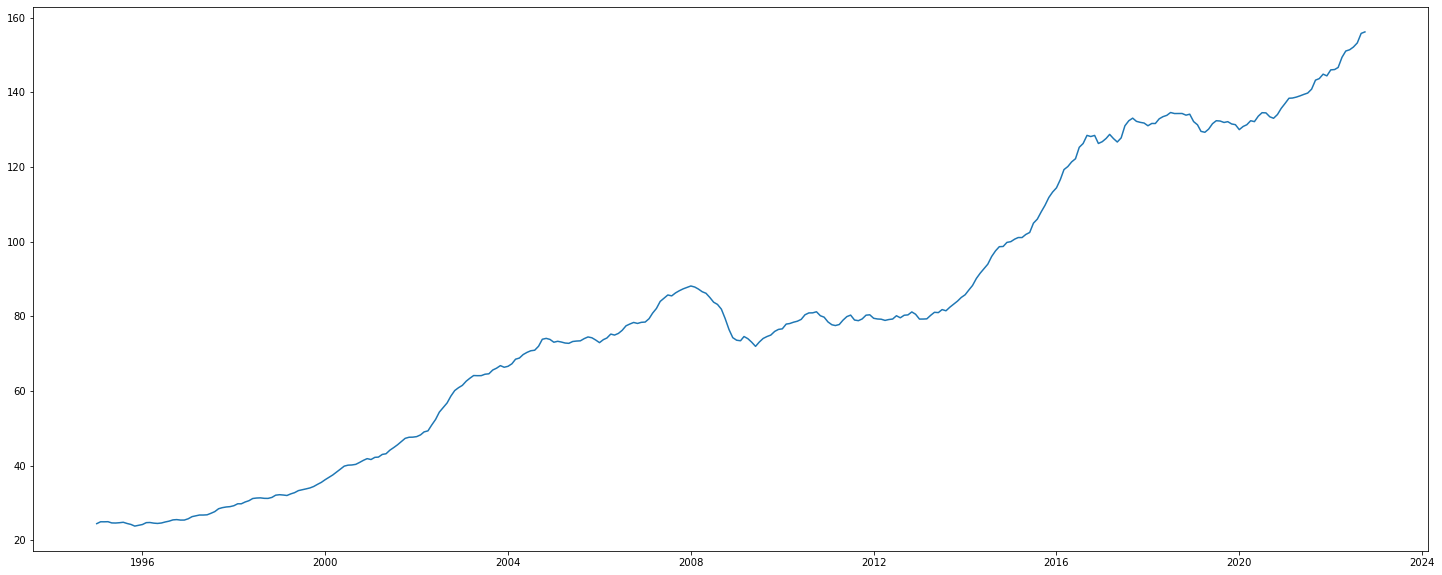

In [17]:
plt.figure(figsize = (25,10))
plt.plot(data1.Date, data1.Index)

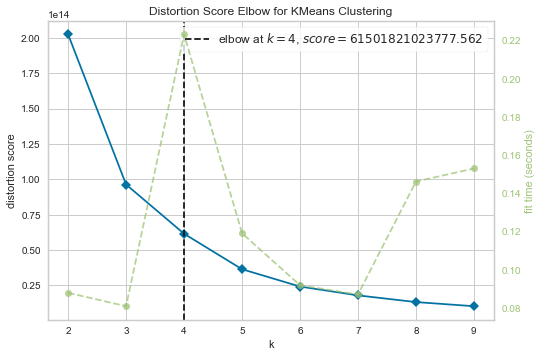

In [102]:
from sklearn.cluster import KMeans 

X_numerics = data[['AveragePrice', 'Index']]

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

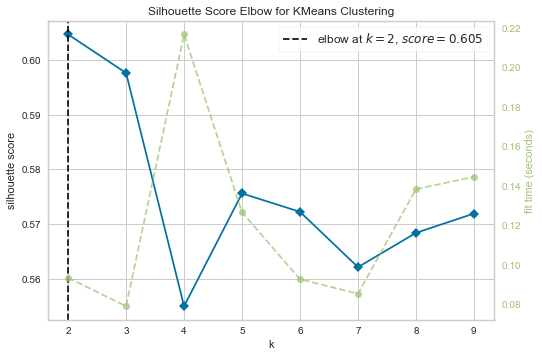

In [103]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [104]:
KM_5_clusters = KMeans(n_clusters=3, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ 
KM5_clustered

,AveragePrice,Index,Cluster
0,50460.22660,22.929155,0
1,51085.77983,23.213407,0
2,51268.96956,23.296649,0
3,53133.50526,24.143895,0
4,53042.24852,24.102427,0
...,...,...,...
11017,643233.39377,116.140527,1
11018,644983.76887,116.456570,1
11019,661467.14368,119.432765,1
11020,667377.57054,120.499936,1


/Users/madhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/madhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


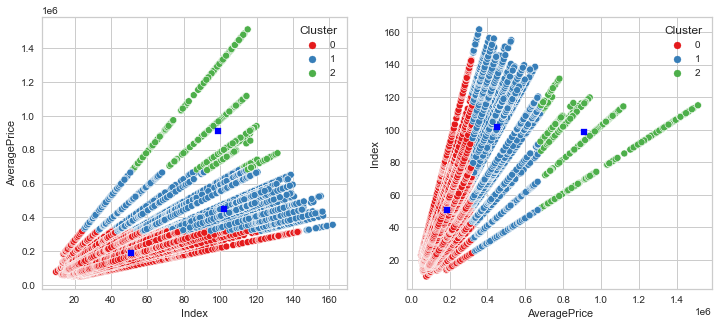

In [105]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Index', 'AveragePrice', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('AveragePrice', 'Index', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,0], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,1], marker='s', s=40, c="blue")
plt.show()